In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
#read the data
data=pd.read_excel("salesdata.xls")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
# shape of data
print(f'{data.shape[0]} samples and {data.shape[1]} features in the insurance  dataset.')

9994 samples and 21 features in the insurance  dataset.


### Understanding the data

In [4]:
#view data types
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [5]:
#view statistical information.
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Data mining 

In [8]:
# missing values
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
#checking for duplicate values
data[data.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [10]:
# checking Unique count
data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [11]:
# Filtering dataset of furniture sales
furniture_data = data[data['Category'] == 'Furniture']

## Exploratory Data Analysis (EDA)

### 1) Seperating categorical and numerical columns

In [12]:
def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<10:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous

In [13]:
categorical,continuous=separate_data_types(furniture_data)
from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"categorical":categorical,
                "continuous":continuous},headers=["categorical","continuous"]))

categorical    continuous
-------------  -------------
Ship Mode      Row ID
Segment        Order ID
Country        Order Date
Region         Ship Date
Category       Customer ID
Sub-Category   Customer Name
               City
               State
               Postal Code
               Product ID
               Product Name
               Sales
               Quantity
               Discount
               Profit


In [14]:
continuous.remove("Order ID")
categorical.append("Order ID")
continuous.remove("Customer ID")
categorical.append("Customer ID")
continuous.remove("Customer Name")
categorical.append("Customer Name")
continuous.remove("City")
categorical.append("City")
continuous.remove("State")
categorical.append("State")
continuous.remove("Product ID")
categorical.append("Product ID")
continuous.remove("Product Name")
categorical.append("Product Name")

In [15]:
from tabulate import tabulate
table = [categorical,continuous]
print(tabulate({'categorical':categorical,
                'continuous': continuous}, headers = ['categorical','continuous']))

categorical    continuous
-------------  ------------
Ship Mode      Row ID
Segment        Order Date
Country        Ship Date
Region         Postal Code
Category       Sales
Sub-Category   Quantity
Order ID       Discount
Customer ID    Profit
Customer Name
City
State
Product ID
Product Name


## Identify Outliers

In [16]:
import numpy as np

In [17]:
print('row and columns before removing outliers:',furniture_data.shape)

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]

row and columns before removing outliers: (2121, 21)


In [18]:
for i in continuous:
    print('i is',i)
    myOutliers(furniture_data,i)
    print('***************************************************')

i is Row ID
the lower range of Row ID is -4881.0
the upper range of Row ID is 14983.0
total outliers in Row ID are 0
***************************************************
i is Order Date
the lower range of Order Date is 2012-06-11T12:00:00.000000000
the upper range of Order Date is 2020-04-26T12:00:00.000000000
total outliers in Order Date are 0
***************************************************
i is Ship Date
the lower range of Ship Date is 2012-06-18T00:00:00.000000000
the upper range of Ship Date is 2020-04-29T00:00:00.000000000
total outliers in Ship Date are 0
***************************************************
i is Postal Code
the lower range of Postal Code is -78045.5
the upper range of Postal Code is 190878.5
total outliers in Postal Code are 0
***************************************************
i is Sales
the lower range of Sales is -535.152
the upper range of Sales is 1017.3600000000001
total outliers in Sales are 164
***************************************************
i is Qu

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

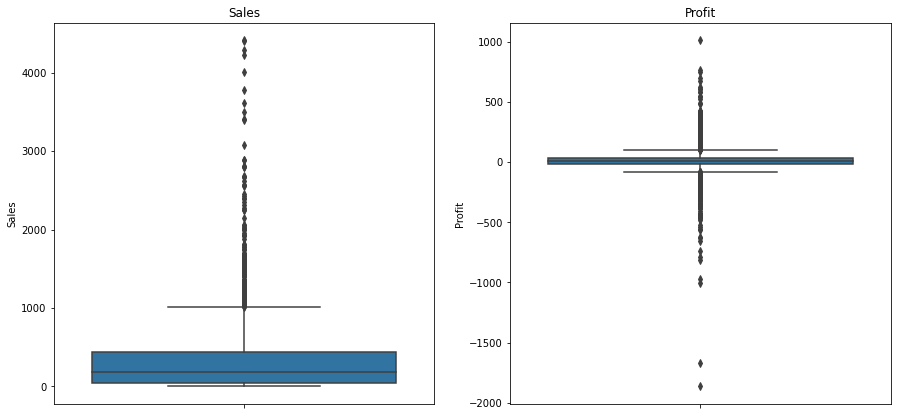

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=furniture_data['Sales'],ax=ax[0]).set(title='Sales')
sns.boxplot(y=furniture_data['Profit'],ax=ax[1]).set(title='Profit')

plt.show()

### Univariate Analysis

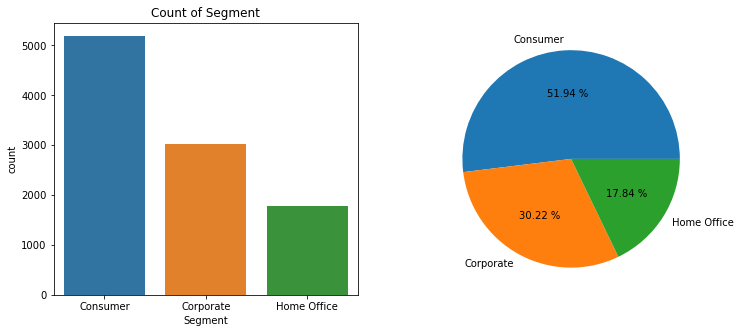

In [21]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of Segment')
percentage = data['Segment'].value_counts()
labels = list(data['Segment'].value_counts().index)

sns.countplot(x = data['Segment'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

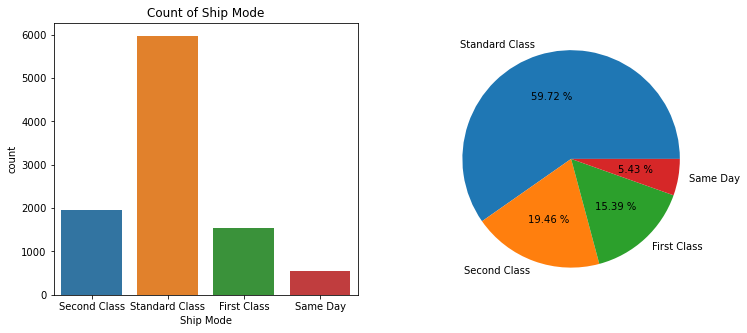

In [22]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of Ship Mode')
percentage = data['Ship Mode'].value_counts()
labels = list(data['Ship Mode'].value_counts().index)

sns.countplot(x = data['Ship Mode'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

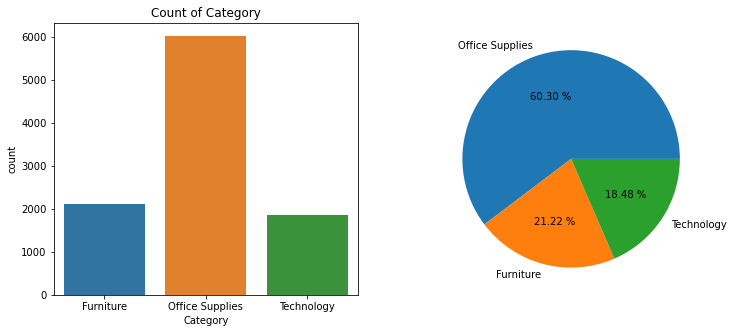

In [23]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of Category')
percentage = data['Category'].value_counts()
labels = list(data['Category'].value_counts().index)

sns.countplot(x = data['Category'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

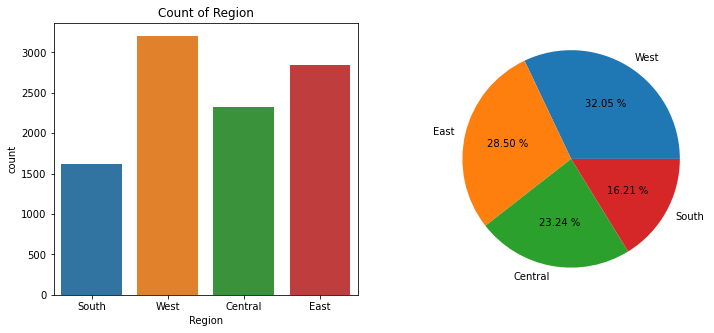

In [24]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of Region')
percentage = data['Region'].value_counts()
labels = list(data['Region'].value_counts().index)

sns.countplot(x = data['Region'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

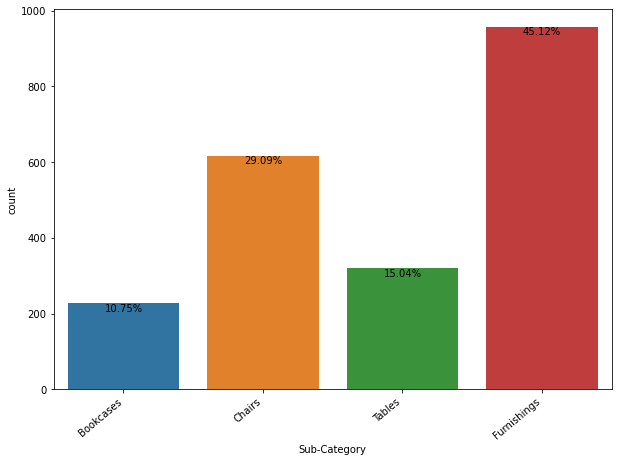

In [25]:
fig,ax= plt.subplots(figsize=(10,7))
ax=sns.countplot(x=furniture_data['Sub-Category'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

count=len(furniture_data['Sub-Category'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

### Bivariate Analysis

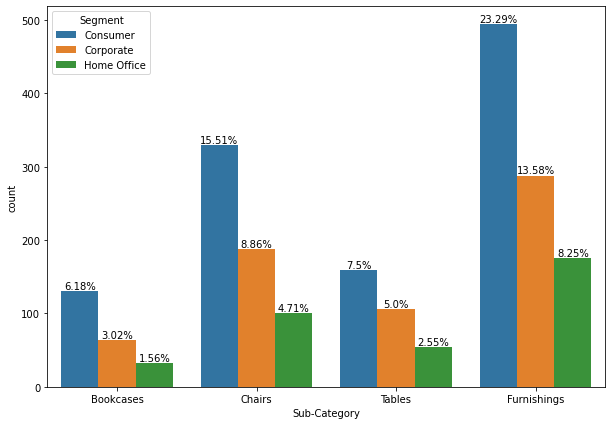

In [26]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(x= 'Sub-Category', hue='Segment', data=furniture_data )
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='bottom')
plt.show()

### Multivariate Analysis

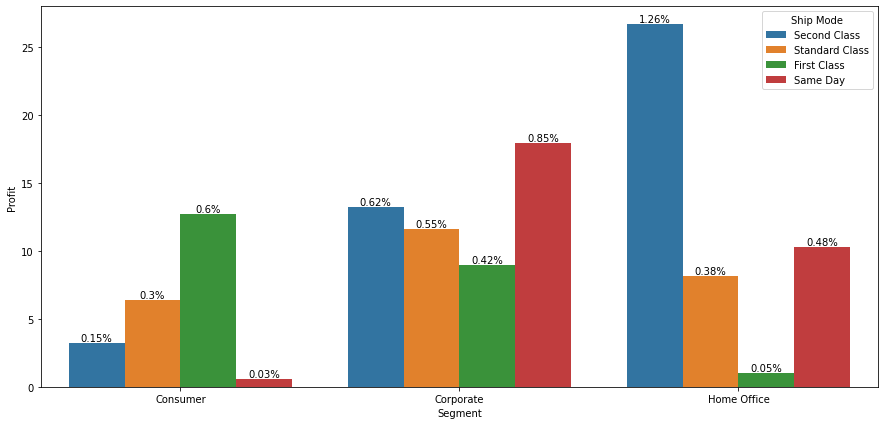

In [27]:
fig,ax= plt.subplots(figsize=(15,7))
sns.barplot(x=furniture_data['Segment'],y=furniture_data['Profit'],hue=furniture_data['Ship Mode'],ci=None,ax=ax)

count=len(furniture_data['Sales'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='bottom')
    
plt.show()

In [28]:
# Dropping the columns that are not needed for this analysis
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 
                                      'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 
                                      'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture = furniture_data.drop(columns,axis = 1)

In [29]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [30]:
furniture.sort_values(by='Order Date')

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [31]:
furniture=furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840
...,...
2015-03-19,383.4656
2016-12-05,13.4000
2015-09-06,85.9800


In [32]:
furniture=furniture[['Sales']]
furniture

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840
...,...
2015-03-19,383.4656
2016-12-05,13.4000
2015-09-06,85.9800


In [33]:
sales = furniture.resample('M').mean() 
# M stands for month
# W stands for week
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-31 to 2017-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


<AxesSubplot:xlabel='Order Date'>

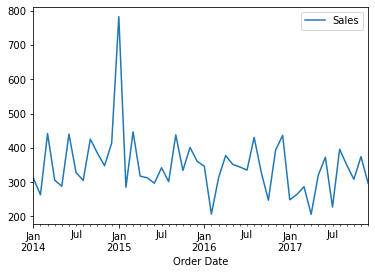

In [34]:
sales.plot()

###  Perform some visual inspections about the data. 

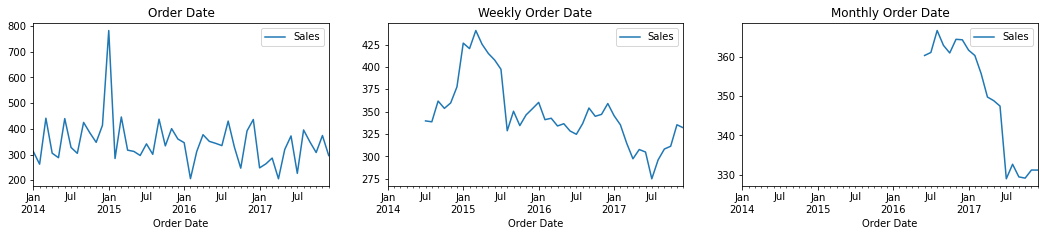

In [35]:
fig, ax=plt.subplots(1,3, figsize=(18,3))
col = "Order Date"
ax[0].set_title(col)
ax[1].set_title("Weekly " + col)
ax[2].set_title("Monthly "+ col)
sales.plot(ax=ax[0])
sales.rolling(window=7).mean().plot(ax=ax[1])
sales.rolling(window=30).mean().plot(ax=ax[2])
plt.show()

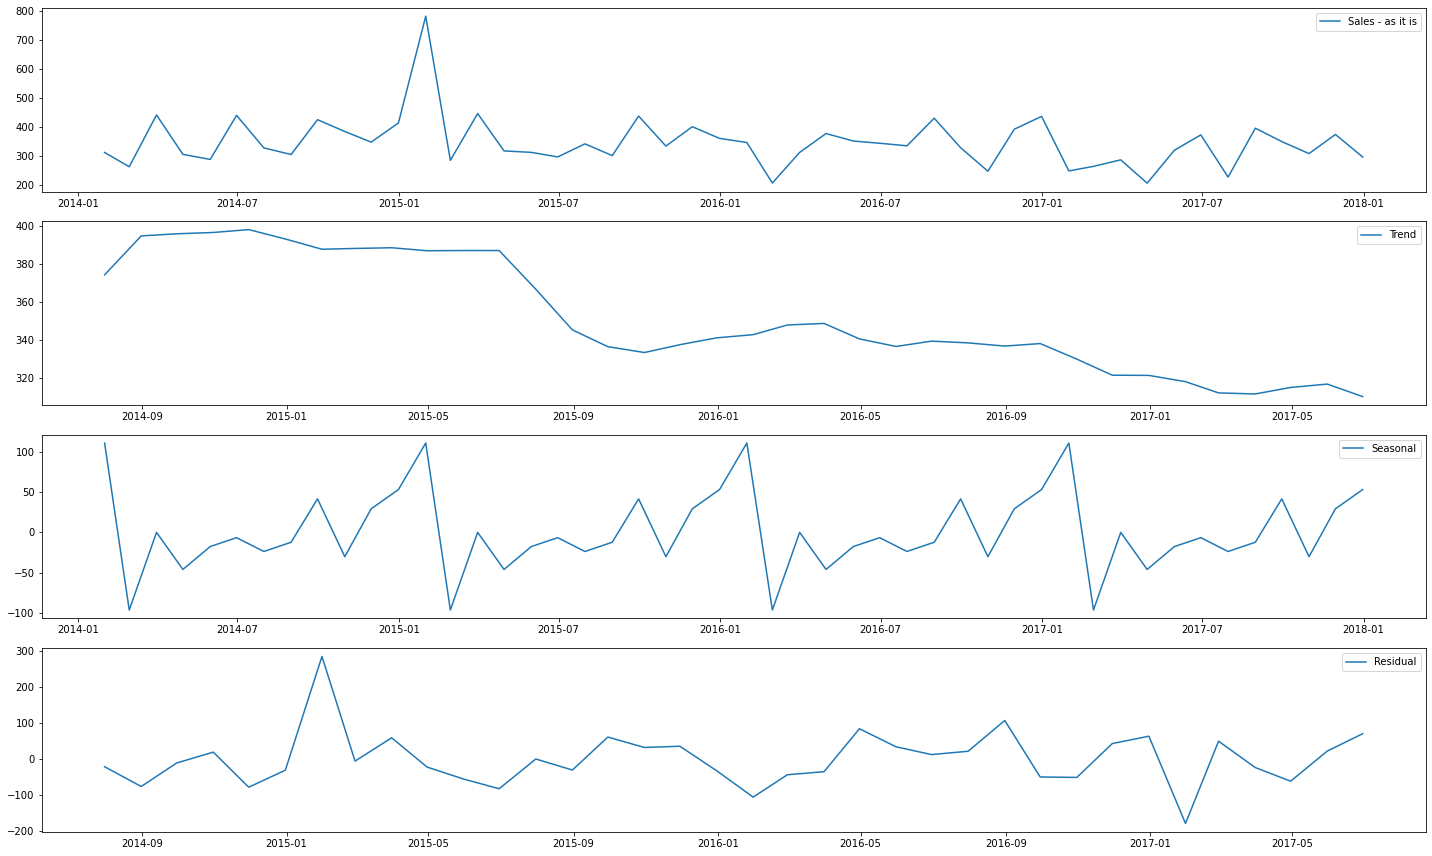

In [36]:
decomposition=seasonal_decompose(sales)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales,label='Sales - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [37]:
# dickey-fuller test for stationarity
def checkStationarity():
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [38]:
res = adfuller(sales)
if res[1] < 0.05:
    print('data is stationary')
else:
    print('data is not stationary')
print(res[1])

data is stationary
9.093398510006677e-10


## Moving Average

In [39]:
lags = 4
moving_avg = sales.rolling(window=lags).mean()

In [40]:
df_ts = pd.DataFrame({'actual':sales['Sales'], 'ma':moving_avg['Sales']})
print(df_ts)

                actual          ma
Order Date                        
2014-01-31  312.126250         NaN
2014-02-28  262.808286         NaN
2014-03-31  441.635030         NaN
2014-04-30  305.570654  330.535055
2014-05-31  288.032792  324.511690
2014-06-30  440.204187  368.860666
2014-07-31  327.910636  340.429567
2014-08-31  305.014437  340.290513
2014-09-30  425.294300  374.605890
2014-10-31  384.507719  360.681773
2014-11-30  347.820527  365.659246
2014-12-31  414.134682  392.939307
2015-01-31  782.662773  482.281425
2015-02-28  284.943091  457.390269
2015-03-31  446.420821  482.040342
2015-04-30  317.445409  457.868024
2015-05-31  312.498350  340.326918
2015-06-30  296.699192  343.265943
2015-07-31  341.860500  317.125863
2015-08-31  301.206006  313.066012
2015-09-30  437.883717  344.412354
2015-10-31  334.072875  353.755774
2015-11-30  401.049773  368.553093
2015-12-31  360.715925  383.430572
2016-01-31  346.488318  360.581723
2016-02-29  206.607947  328.715491
2016-03-31  312.2217

In [41]:
df_ts.actual.head(lags).mean()

330.53505496586746

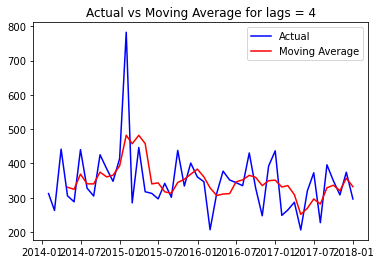

In [42]:
# plot the actual and moving average for comparison
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))
plt.legend()
plt.show()

## Exponential Smoothing

### Triple Exponent Smoothing (no trend/seasonality)

In [43]:
# build model
model = ExponentialSmoothing(sales,trend='add',seasonal='add',seasonal_periods=12).fit()

2018-01-31    337.858960
2018-02-28    203.811189
2018-03-31    332.826528
2018-04-30    251.612482
2018-05-31    261.936625
2018-06-30    330.476873
2018-07-31    260.730336
2018-08-31    297.519393
2018-09-30    339.151914
2018-10-31    281.012666
2018-11-30    320.668654
2018-12-31    342.062012
Freq: M, dtype: float64

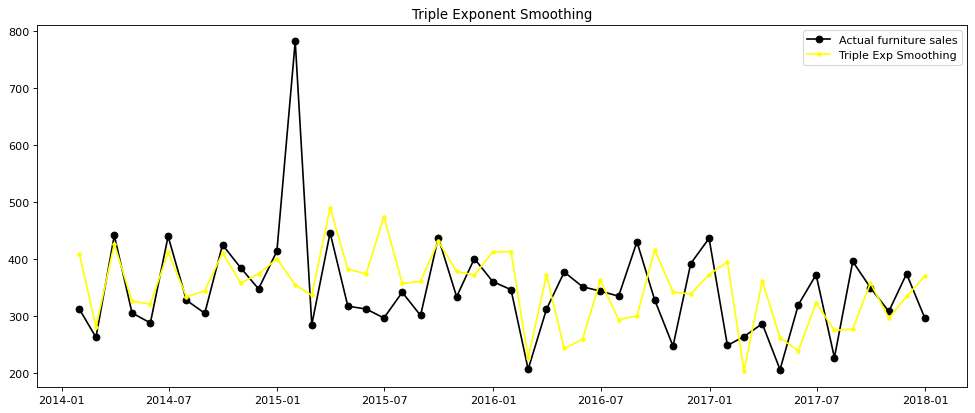

In [44]:
# plot the actual and triple smoothing values
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(sales, marker='o',color='black',label='Actual furniture sales')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

model.forecast(12)

In [45]:
# Stationarity check
res = adfuller(sales)
if res[1] < 0.05:
    print('data is stationary')
else:
    print('data is not stationary')
print(res[1])


sales=pd.DataFrame(model.fittedvalues)
sales.rename(columns = {0:'Sales'}, inplace = True)

data is stationary
9.093398510006677e-10


### Plot ACF and PACF

In [46]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(data.dropna(), nlags=20)
lag_pacf = pacf(data.dropna(), nlags=20, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

ValueError: could not convert string to float: 'CA-2016-152156'

### Split the data into a 80:20 ratio

In [ ]:
ss = int(0.8 * len(sales))

train = sales.iloc[:ss]
test = sales.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

### Use auto ARIMA for selection of p, d, q

In [ ]:
# auto ARIMA (to help in the selection of p,d,q)
m1 = auto_arima(furniture['Sales'],start_p=0,max_p=1, start_q=0,max_q=1, seasonal=False, trace=True)
print(m1.summary())

### Split data into training and test parts

In [ ]:
# split the data into train and test
ss = int(0.8 * len(sales))

train = sales.iloc[:ss]
test = sales.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

### Build the ARMA Model

In [ ]:
# start with initial values for p and q
p=1; q=1
m1 = ARIMA(train,order=(p,0,q)).fit()
print(m1.summary())

In [ ]:
# predictions
predictions = m1.predict(0,len(test)-1)
print(predictions)

In [ ]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test["Sales"][i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)
plt.show()

In [ ]:
# Perform the LJung-Box test


# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

In [ ]:
# Calculate MSE and RMSE of the Model from the test

# MSE
# RMSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

print(df_res)

In [ ]:
# Plot the actual data and predicted data

df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### Build the ARIMA model

In [ ]:
# start with initial values for p and q based on auto_arima recommendation
p=1; d=1; q=1
m1 = ARIMA(train['Sales'],order=(p,d,q)).fit()
print(m1.summary())

#### Predict the test data using the model

In [ ]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m1.predict(start,end,typ='levels')
print(predictions)


## Collate actual, predicted, and error values together

In [ ]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m1.predict(start,end,typ='levels')

df_res = pd.DataFrame({'actual':actual, 'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)
plt.show()

In [ ]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

In [ ]:
# MSE
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

In [ ]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### Forecast the future data using the model

In [ ]:
# forecast into the future
m2 = ARIMA(sales,order=(p,d,q)).fit()
fcast = m2.predict(start=len(sales), end=len(sales)+11, typ='levels')
print(fcast)

In [ ]:
sales.plot(figsize=(10,7),legend=True)
fcast.plot(legend=True)
plt.title(msg)

## SARIMA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset

In [ ]:
p=1; q=1; d=1
m1 = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
print(m1.summary())

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m1.predict(start=start,end=end,dynamic=True)

df_res = pd.DataFrame({'actual':actual, 'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)
df_res.err.plot()

In [ ]:
# plot
df_res[['actual','predicted']].plot(figsize=(12,8))

In [ ]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1][0]
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

In [ ]:
# MSE
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

In [ ]:
p = 1; d = 1; q = 1
m3_f = sm.tsa.statespace.SARIMAX(sales,order=(p,d,q),seasonal_order=(0,d,q,12)).fit()
fcast = m3_f.predict(start=end, end=len(sales)+48, typ='levels')
fcast[0] = 296.296857

sales.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True,label = 'forecast')
plt.title(msg)

In [ ]:
sales.tail()

In [ ]:
sales.head()

In [ ]:
fcast.head()